In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import pandas as pd

In [3]:
train_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
train_df.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
115,116,160,FV,34.0,3230,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,176000
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
533,534,20,RL,50.0,5000,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,39300
167,168,60,RL,86.0,10562,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,New,Partial,325624
931,932,20,RL,70.0,9100,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,7,2009,WD,Normal,117500
1332,1333,20,RL,67.0,8877,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,100000
525,526,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,176000
1010,1011,50,RL,115.0,21286,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,WD,Normal,135000
1164,1165,80,RL,NaN,16157,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,194000
580,581,20,RL,NaN,14585,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,181900


In [36]:
test_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
test_df.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
851,2312,60,RL,59.0,15810,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,New,Partial
48,1509,60,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdWo,NaN,0,6,2010,WD,Normal
566,2027,160,FV,30.0,3180,Pave,Pave,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal
541,2002,20,RL,74.0,13253,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal
638,2099,20,RM,62.0,7311,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2008,WD,Abnorml


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
train_df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

## **Getting columns with more than 1 na**

In [8]:
columns_with_nans = train_df.columns[train_df.isnull().sum() > 1]

# Print details of columns with more than 1 NaN value
for column in columns_with_nans:
    print(f"Column: {column}")
    print(f"Number of NaN values: {train_df[column].isnull().sum()}")

Column: LotFrontage
Number of NaN values: 259
Column: Alley
Number of NaN values: 1369
Column: MasVnrType
Number of NaN values: 872
Column: MasVnrArea
Number of NaN values: 8
Column: BsmtQual
Number of NaN values: 37
Column: BsmtCond
Number of NaN values: 37
Column: BsmtExposure
Number of NaN values: 38
Column: BsmtFinType1
Number of NaN values: 37
Column: BsmtFinType2
Number of NaN values: 38
Column: FireplaceQu
Number of NaN values: 690
Column: GarageType
Number of NaN values: 81
Column: GarageYrBlt
Number of NaN values: 81
Column: GarageFinish
Number of NaN values: 81
Column: GarageQual
Number of NaN values: 81
Column: GarageCond
Number of NaN values: 81
Column: PoolQC
Number of NaN values: 1453
Column: Fence
Number of NaN values: 1179
Column: MiscFeature
Number of NaN values: 1406


In [10]:
len(train_df)

1460

In [9]:
columns_with_nans

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'],
      dtype='object')

**Column Alley, PoolQC and MiscFeature** contain >1400 nan values. Deleting this columns

In [11]:
train_df = train_df.drop(columns=['PoolQC', 'Alley', 'MiscFeature'])


In [12]:
columns_with_nans = train_df.columns[train_df.isnull().sum() > 1]

# Print details of columns with more than 1 NaN value
for column in columns_with_nans:
    print(f"Column: {column}")
    print(f"Number of NaN values: {train_df[column].isnull().sum()}")

Column: LotFrontage
Number of NaN values: 259
Column: MasVnrType
Number of NaN values: 872
Column: MasVnrArea
Number of NaN values: 8
Column: BsmtQual
Number of NaN values: 37
Column: BsmtCond
Number of NaN values: 37
Column: BsmtExposure
Number of NaN values: 38
Column: BsmtFinType1
Number of NaN values: 37
Column: BsmtFinType2
Number of NaN values: 38
Column: FireplaceQu
Number of NaN values: 690
Column: GarageType
Number of NaN values: 81
Column: GarageYrBlt
Number of NaN values: 81
Column: GarageFinish
Number of NaN values: 81
Column: GarageQual
Number of NaN values: 81
Column: GarageCond
Number of NaN values: 81
Column: Fence
Number of NaN values: 1179


## Imputing using Median (Less sensitive to Outliers)

**For NUMERICAL DATA**

In [13]:
train_df['LotFrontage'].fillna(train_df['LotFrontage'].median(), inplace=True)
train_df['MasVnrArea'].fillna(train_df['MasVnrArea'].median(), inplace=True)
train_df['GarageYrBlt'].fillna(train_df['GarageYrBlt'].median(), inplace=True)

## Imputing Categorial Data

**USING MODE, Most FREQUENT VALUES**

In [14]:
for column in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    train_df[column].fillna(train_df[column].mode()[0], inplace=True)


In [15]:
columns_with_nans = train_df.columns[train_df.isnull().sum() > 1]

for column in columns_with_nans:
    print(f"Column: {column}")
    print(f"Number of NaN values: {train_df[column].isnull().sum()}")

Column: MasVnrType
Number of NaN values: 872
Column: Fence
Number of NaN values: 1179


In [16]:
train_df['MasVnrType'].fillna(train_df['MasVnrType'].mean(), inplace=True)
train_df['Fence'].fillna(train_df['Fence'].mean(), inplace=True)

TypeError: can only concatenate str (not "int") to str

In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Dropping columns which are not int or float

In [24]:
numerical_columns = train_df.select_dtypes(include=['int64', 'float64'])
numerical_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1460 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [25]:
numerical_columns

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [39]:
train_df = train_df.select_dtypes(include=['int64', 'float64'])

In [40]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1460 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

All int and floats, and no nan values.

**Updating the Test data as well**

In [41]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [42]:
test_df['BsmtFullBath'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1459 entries, 0 to 1458
Series name: BsmtFullBath
Non-Null Count  Dtype  
--------------  -----  
1457 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB


In [43]:
test_df = test_df.select_dtypes(include=['int64', 'float64'])

In [44]:
test_df.columns == train_df.columns[:-1]
#train also contain target in the last column

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [47]:
print('Test           --         Train')
for i in range(len(test_df.columns)):
    print(test_df.columns[i], "\t--", train_df.columns[i])

Test           --         Train
Id 	-- Id
MSSubClass 	-- MSSubClass
LotFrontage 	-- LotFrontage
LotArea 	-- LotArea
OverallQual 	-- OverallQual
OverallCond 	-- OverallCond
YearBuilt 	-- YearBuilt
YearRemodAdd 	-- YearRemodAdd
MasVnrArea 	-- MasVnrArea
BsmtFinSF1 	-- BsmtFinSF1
BsmtFinSF2 	-- BsmtFinSF2
BsmtUnfSF 	-- BsmtUnfSF
TotalBsmtSF 	-- TotalBsmtSF
1stFlrSF 	-- 1stFlrSF
2ndFlrSF 	-- 2ndFlrSF
LowQualFinSF 	-- LowQualFinSF
GrLivArea 	-- GrLivArea
BsmtFullBath 	-- BsmtFullBath
BsmtHalfBath 	-- BsmtHalfBath
FullBath 	-- FullBath
HalfBath 	-- HalfBath
BedroomAbvGr 	-- BedroomAbvGr
KitchenAbvGr 	-- KitchenAbvGr
TotRmsAbvGrd 	-- TotRmsAbvGrd
Fireplaces 	-- Fireplaces
GarageYrBlt 	-- GarageYrBlt
GarageCars 	-- GarageCars
GarageArea 	-- GarageArea
WoodDeckSF 	-- WoodDeckSF
OpenPorchSF 	-- OpenPorchSF
EnclosedPorch 	-- EnclosedPorch
3SsnPorch 	-- 3SsnPorch
ScreenPorch 	-- ScreenPorch
PoolArea 	-- PoolArea
MiscVal 	-- MiscVal
MoSold 	-- MoSold
YrSold 	-- YrSold


In [48]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   OverallQual    1459 non-null   int64  
 5   OverallCond    1459 non-null   int64  
 6   YearBuilt      1459 non-null   int64  
 7   YearRemodAdd   1459 non-null   int64  
 8   MasVnrArea     1444 non-null   float64
 9   BsmtFinSF1     1458 non-null   float64
 10  BsmtFinSF2     1458 non-null   float64
 11  BsmtUnfSF      1458 non-null   float64
 12  TotalBsmtSF    1458 non-null   float64
 13  1stFlrSF       1459 non-null   int64  
 14  2ndFlrSF       1459 non-null   int64  
 15  LowQualFinSF   1459 non-null   int64  
 16  GrLivArea      1459 non-null   int64  
 17  BsmtFullBath   1457 non-null   float64
 18  BsmtHalf

In [49]:
columns_with_nans = test_df.columns[test_df.isnull().sum() > 1]

for column in columns_with_nans:
    print(f"Column: {column}")
    print(f"Number of NaN values: {test_df[column].isnull().sum()}")

Column: LotFrontage
Number of NaN values: 227
Column: MasVnrArea
Number of NaN values: 15
Column: BsmtFullBath
Number of NaN values: 2
Column: BsmtHalfBath
Number of NaN values: 2
Column: GarageYrBlt
Number of NaN values: 78


In [50]:
test_df['LotFrontage'].fillna(test_df['LotFrontage'].median(), inplace=True)
test_df['MasVnrArea'].fillna(test_df['MasVnrArea'].median(), inplace=True)
test_df['GarageYrBlt'].fillna(test_df['GarageYrBlt'].median(), inplace=True)

In [52]:
test_df['BsmtFullBath']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1454    0.0
1455    0.0
1456    1.0
1457    0.0
1458    0.0
Name: BsmtFullBath, Length: 1459, dtype: float64

In [54]:
test_df['BsmtFullBath'].fillna(test_df['BsmtFullBath'].mode()[0], inplace=True)
test_df['BsmtHalfBath'].fillna(test_df['BsmtHalfBath'].mode()[0], inplace=True)

In [55]:
columns_with_nans = test_df.columns[test_df.isnull().sum() > 1]

for column in columns_with_nans:
    print(f"Column: {column}")
    print(f"Number of NaN values: {test_df[column].isnull().sum()}")

## CREATING THE MODEL

In [56]:
x_train = train_df.to_numpy()[:, :-1] #only features, not the last column/target
x_train

array([[1.000e+00, 6.000e+01, 6.500e+01, ..., 0.000e+00, 2.000e+00,
        2.008e+03],
       [2.000e+00, 2.000e+01, 8.000e+01, ..., 0.000e+00, 5.000e+00,
        2.007e+03],
       [3.000e+00, 6.000e+01, 6.800e+01, ..., 0.000e+00, 9.000e+00,
        2.008e+03],
       ...,
       [1.458e+03, 7.000e+01, 6.600e+01, ..., 2.500e+03, 5.000e+00,
        2.010e+03],
       [1.459e+03, 2.000e+01, 6.800e+01, ..., 0.000e+00, 4.000e+00,
        2.010e+03],
       [1.460e+03, 2.000e+01, 7.500e+01, ..., 0.000e+00, 6.000e+00,
        2.008e+03]])

In [57]:
y_train = train_df.to_numpy()[:, -1]
y_train

array([208500., 181500., 223500., ..., 266500., 142125., 147500.])

In [58]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(x_train, y_train)

lr

LinearRegression()

In [59]:
from sklearn.metrics import mean_absolute_error

In [60]:
from copy import deepcopy
temp = deepcopy(train_df)

In [61]:
temp['linearPrediction'] = lr.predict(x_train)

In [62]:
temp

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,linearPrediction
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,61,0,0,0,0,0,2,2008,208500,229767.249565
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,0,0,5,2007,181500,194178.434629
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,42,0,0,0,0,0,9,2008,223500,224275.302386
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,35,272,0,0,0,0,2,2006,140000,201502.866115
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,84,0,0,0,0,0,12,2008,250000,290895.277460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,40,0,0,0,0,0,8,2007,175000,184037.717276
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,0,0,0,2,2010,210000,246190.731286
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,60,0,0,0,0,2500,5,2010,266500,226204.023936
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,112,0,0,0,0,4,2010,142125,133208.430428


In [63]:
mean_absolute_error(temp['SalePrice'], temp['linearPrediction'])

21098.199437876192

In [64]:
x_test = test_df.to_numpy()
x_test

array([[1.461e+03, 2.000e+01, 8.000e+01, ..., 0.000e+00, 6.000e+00,
        2.010e+03],
       [1.462e+03, 2.000e+01, 8.100e+01, ..., 1.250e+04, 6.000e+00,
        2.010e+03],
       [1.463e+03, 6.000e+01, 7.400e+01, ..., 0.000e+00, 3.000e+00,
        2.010e+03],
       ...,
       [2.917e+03, 2.000e+01, 1.600e+02, ..., 0.000e+00, 9.000e+00,
        2.006e+03],
       [2.918e+03, 8.500e+01, 6.200e+01, ..., 7.000e+02, 7.000e+00,
        2.006e+03],
       [2.919e+03, 6.000e+01, 7.400e+01, ..., 0.000e+00, 1.100e+01,
        2.006e+03]])

In [65]:
test_df['SalePrice'] = lr.predict(x_test)
test_df

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [66]:
test_df.isna().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       1
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       1
GarageArea       1
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [67]:
test_df.fillna(0, inplace=True)

In [68]:
test_df.isna().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [69]:
x_test = test_df.to_numpy()
x_test

array([[1.461e+03, 2.000e+01, 8.000e+01, ..., 0.000e+00, 6.000e+00,
        2.010e+03],
       [1.462e+03, 2.000e+01, 8.100e+01, ..., 1.250e+04, 6.000e+00,
        2.010e+03],
       [1.463e+03, 6.000e+01, 7.400e+01, ..., 0.000e+00, 3.000e+00,
        2.010e+03],
       ...,
       [2.917e+03, 2.000e+01, 1.600e+02, ..., 0.000e+00, 9.000e+00,
        2.006e+03],
       [2.918e+03, 8.500e+01, 6.200e+01, ..., 7.000e+02, 7.000e+00,
        2.006e+03],
       [2.919e+03, 6.000e+01, 7.400e+01, ..., 0.000e+00, 1.100e+01,
        2.006e+03]])

In [70]:
test_df['SalePrice'] = lr.predict(x_test)
test_df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,140,0,0,0,120,0,0,6,2010,115804.858212
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,393,36,0,0,0,0,12500,6,2010,150931.231892
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,212,34,0,0,0,0,0,3,2010,172034.275787
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,360,36,0,0,0,0,0,6,2010,198561.383873
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,82,0,0,144,0,0,1,2010,194955.920239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,0,0,0,0,0,0,0,6,2006,56233.293821
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,0,24,0,0,0,0,0,4,2006,63333.873752
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,474,0,0,0,0,0,0,9,2006,168823.754678
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,80,32,0,0,0,0,700,7,2006,98982.330721


In [71]:
len(test_df.columns)

38

In [72]:
test_df[['Id', 'SalePrice']].to_csv('Linear_Prediction_using_18_Cols.csv', index=False)

## **NEED IMPROVEMENT, Some other Model than Linear Regression

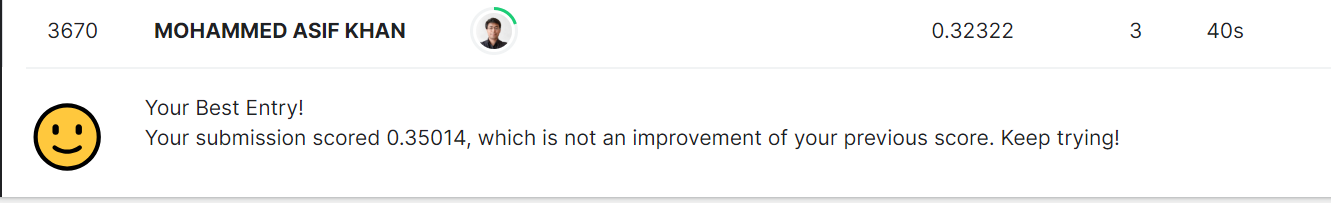

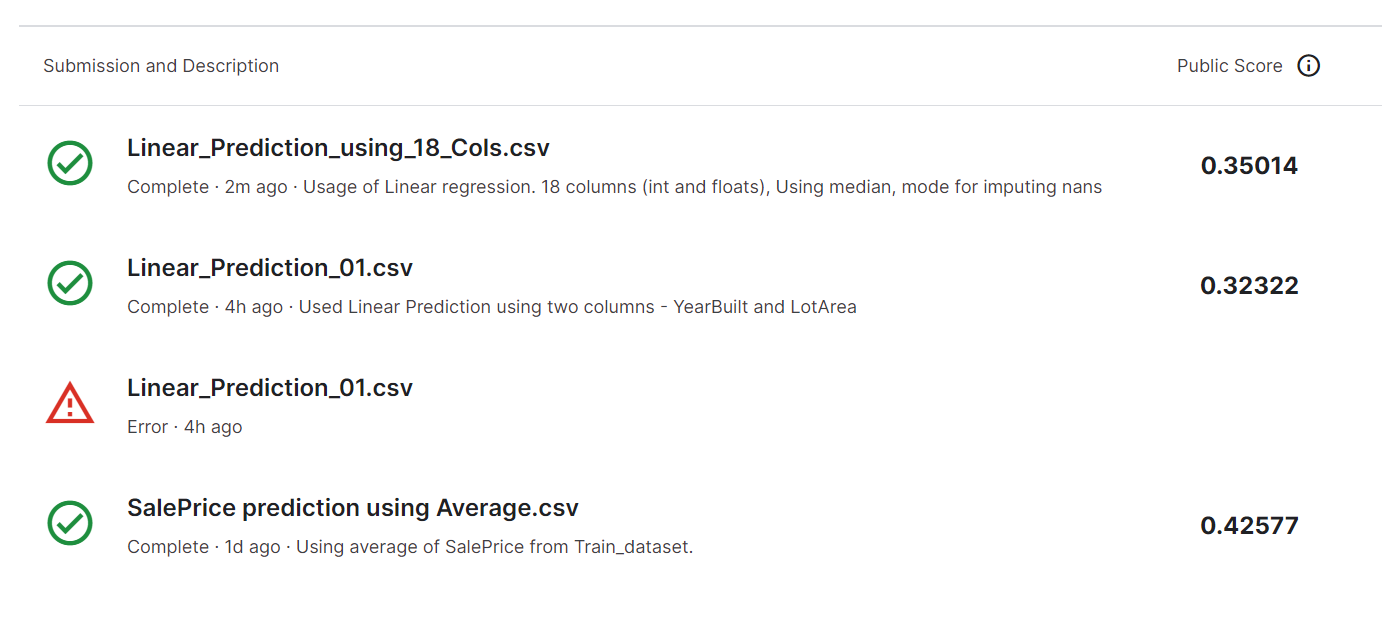